In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('F:\Machine Learning\Machine Learning 2.0\C12 K Means Clustering Algorithm\Tutorial\income.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\HP\AppData\Local\Temp\ipykernel_12640\2406911242.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('F:\Machine Learning\Machine Learning 2.0\C12 K Means Clustering Algorithm\Tutorial\income.csv')


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

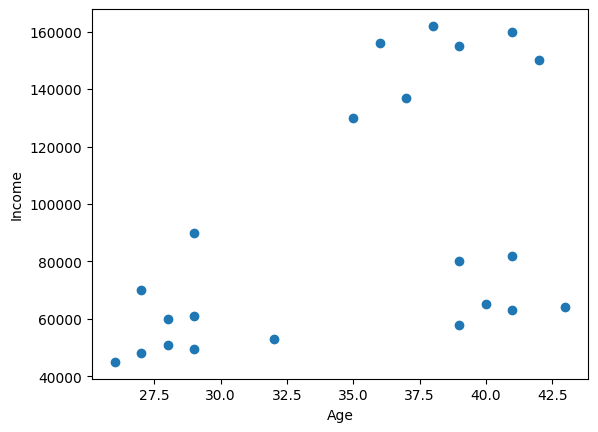

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
km = KMeans(n_clusters=3,random_state=42)
y_pred = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


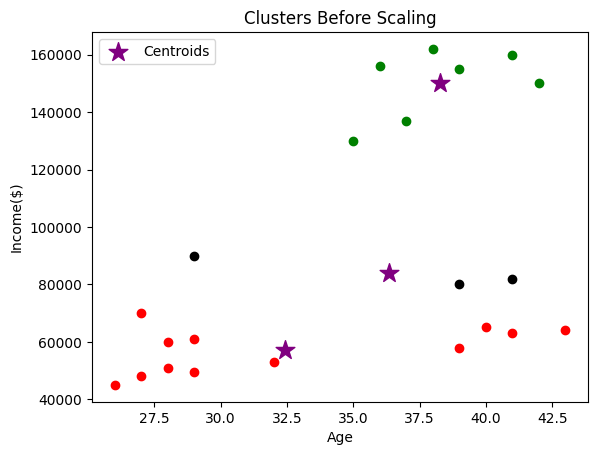

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1.Age,df1['Income($)'],color = 'green')
plt.scatter(df2.Age,df2['Income($)'],color = 'red')
plt.scatter(df3.Age,df3['Income($)'],color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clusters Before Scaling')
plt.legend()
plt.show()

In [9]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
print(df.head())

      Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        2
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        0


In [10]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted

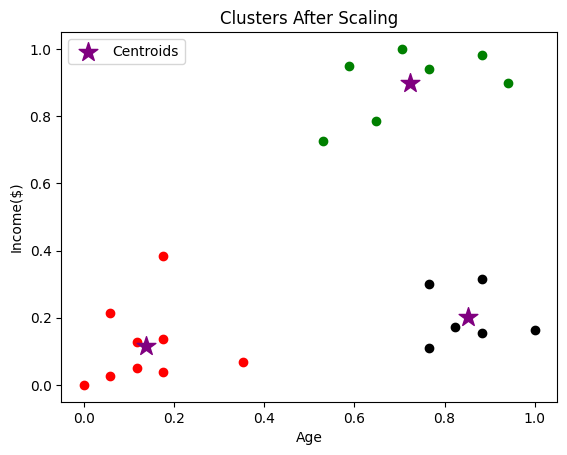

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clusters After Scaling')
plt.legend()
plt.show()

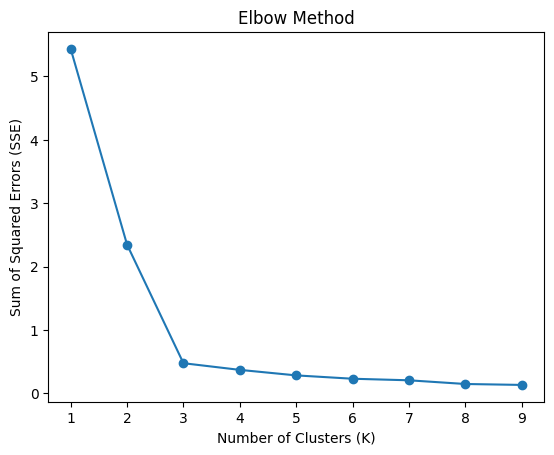

In [12]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()